# Prepping the Data

In [1]:
import pysr
from pysr import PySRRegressor

import xarray as xr
import netCDF4 as nc
#import h5netcdf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from glob import glob

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
folder_path = '/home/laurapong321/leap_24/les_sim_2'

In [3]:
def read_data(filepath):
    """
    Reads in each dataset and returns an xarray dataset
    """

    ds_thm = xr.open_dataset(f"{filepath}",
                             decode_times=False, group="thermo")
    ds_bud = xr.open_dataset(f"{filepath}",
                            decode_times=False, group="budget")
    ds_def = xr.open_dataset(f"{filepath}", 
                             decode_times=False, group="default")
    return xr.merge([ds_thm, ds_bud, ds_def], join="inner")

In [4]:
#opening data
folder_path = '/home/laurapong321/leap_24/les_sim_2'

files = glob(f"{folder_path}/*")

iv16_1 = read_data(files[1])
iv16_3 = read_data(files[2])
i16_6 = read_data(files[3])
iv16_6 = read_data(files[4])
iv16_10 = read_data(files[5])
ii10_1 = read_data(files[6])
i2_20 = read_data(files[7])
iv2_10 = read_data(files[8])
iii2_1 = read_data(files[9])
i2_24 = read_data(files[10])
iii8_3 = read_data(files[11])
ii8_3 = read_data(files[12])
iv8_3 = read_data(files[13])
iv8_6 = read_data(files[14])

# Plots Instructions

### Generate the following plots for data analysis:
 1. Time vs. PBL (Planetary Boundary Layer) height: This plot helps visualize how the boundary layer height varies over time.
 2. Theta vs. Height: Plot Theta (potential temperature) against height to analyze temperature profiles in the atmosphere.
 3. Theta Flux vs. Height: Show how Theta flux (turbulent heat flux) varies with height.

For the plots involving height (Theta vs. Height, Theta Flux vs. Height), consider plotting several time steps.
This approach will illustrate how the profiles evolve with time, providing insights into dynamic changes in the atmosphere.

In [5]:
# weak inversion, ug=8, q=006
iv8_6_plot_var = iv8_6[["zi", "th", "th_flux"]]

Text(0.5, 1.0, 'Plot 1: Time vs PBL')

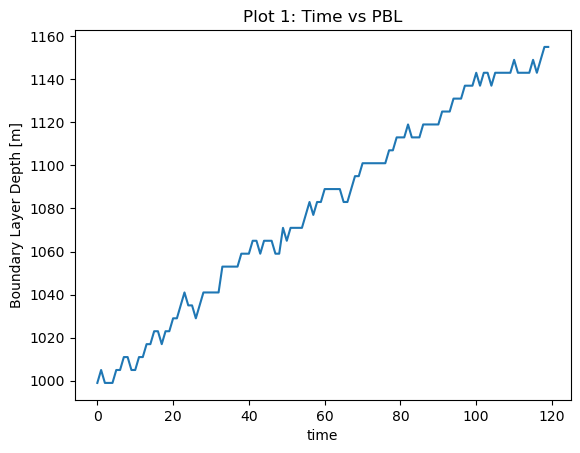

In [6]:
iv8_6_plot_var.zi.plot()
plt.title("Plot 1: Time vs PBL")

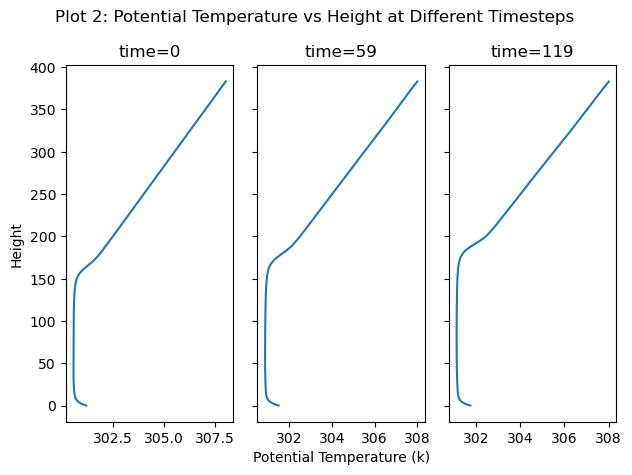

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.suptitle('Plot 2: Potential Temperature vs Height at Different Timesteps')

ax1.plot(iv8_6_plot_var.th.sel(time=0), iv8_6_plot_var.z)
ax1.set_title(f"time=0")
ax1.set_ylabel("Height")

ax2.plot(iv8_6_plot_var.th.sel(time=59), iv8_6_plot_var.z)
ax2.set_title(f"time=59")
ax2.set_xlabel("Potential Temperature (k)")

ax3.plot(iv8_6_plot_var.th.sel(time=119), iv8_6_plot_var.z)
ax3.set_title(f"time=119")

plt.tight_layout()


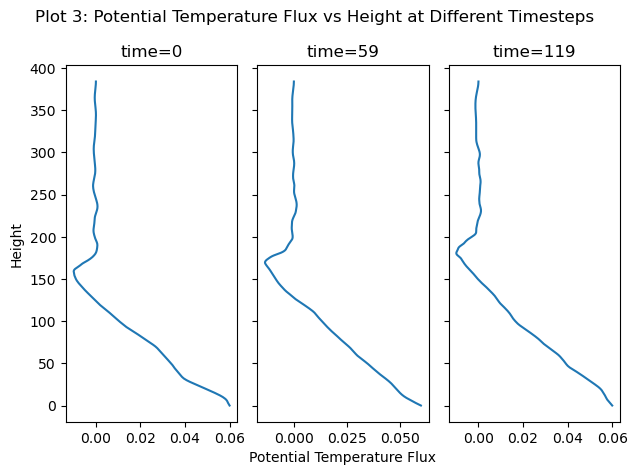

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.suptitle('Plot 3: Potential Temperature Flux vs Height at Different Timesteps')

ax1.plot(iv8_6_plot_var.th_flux.sel(time=0), iv8_6_plot_var.zh)
ax1.set_title(f"time=0")
ax1.set_ylabel("Height")

ax2.plot(iv8_6_plot_var.th_flux.sel(time=59), iv8_6_plot_var.zh)
ax2.set_title(f"time=59")
ax2.set_xlabel("Potential Temperature Flux")

ax3.plot(iv8_6_plot_var.th_flux.sel(time=119), iv8_6_plot_var.zh)
ax3.set_title(f"time=119")

plt.tight_layout()


# Impact of Large-Scale Conditions on Variables

### Overview:
#### Our simulations incorporate three main large-scale variables:
 1. Surface Heating (Q): Influences the heat profile.
 2. Wind (ug): Affects the movement and distribution of air properties.
 3. Inversion (dtheta/dz): Impacts the stratification and stability, influencing PBL growth.

### Objective:
 Analyze how different combinations of these large-scale variables affect the profiles of heat, heat flux, and the growth of the PBL.

### Instructions for Plotting:
 Repeat the plotting process for multiple simulations to compare results. For each variable (heat, heat flux, PBL growth), plot the profiles from several simulations in the same figure. This visualization will help in understanding the differential impacts of Q, ug, and dtheta/dz on the simulated conditions.

 This comparative approach will provide deeper insights into the effects of large-scale atmospheric conditions on local environmental dynamics.


In [9]:
### subsetting data ###



## to compare the effects of inversion

# weak inversion, ug=8, q=003
iv8_3_plot_var = iv8_3[["zi", "th", "th_flux"]]

# strong-medium inversion, ug=8, q=003
ii8_3_plot_var = ii8_3[["zi", "th", "th_flux"]]

# weak-medium inversion, ug=8, q=003
iii8_3_plot_var = iii8_3[["zi", "th", "th_flux"]]


## to compare the effects of q

# weak inversion, ug=16, q=001
iv16_1_plot_var = iv16_1[["zi", "th", "th_flux"]]

# weak inversion, ug=16, q=003
iv16_3_plot_var = iv16_3[["zi", "th", "th_flux"]]


## to compare the effects of ug, compare 
# iv16_3_plot_var and iv8_3_plot_var

## Comparing simulations: Time vs PBL

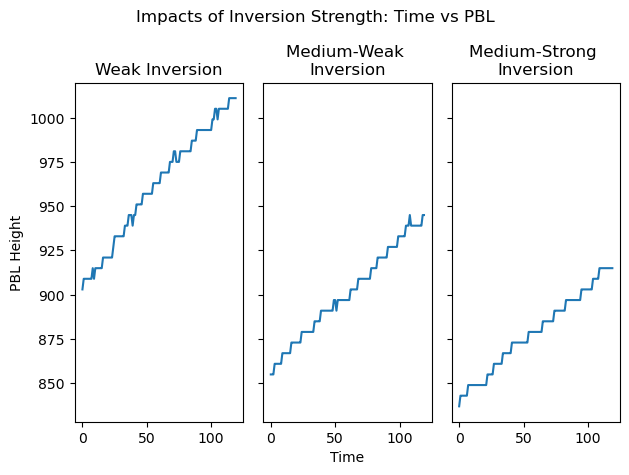

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.suptitle('Impacts of Inversion Strength: Time vs PBL')

ax1.plot(iv8_3_plot_var.zi)
ax1.set_title(f"Weak Inversion")
ax1.set_ylabel("PBL Height")

ax2.plot(iii8_3_plot_var.zi)
ax2.set_title(f"Medium-Weak \nInversion")
ax2.set_xlabel("Time")

ax3.plot(ii8_3_plot_var.zi)
ax3.set_title(f"Medium-Strong \nInversion")

plt.tight_layout()

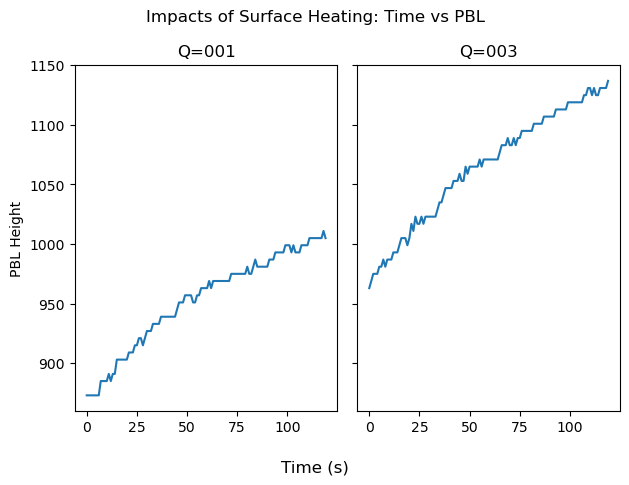

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

fig.suptitle('Impacts of Surface Heating: Time vs PBL')

ax1.plot(iv16_1_plot_var.zi)
ax1.set_title(f"Q=001")
ax1.set_ylabel("PBL Height")

ax2.plot(iv16_3_plot_var.zi)
ax2.set_title(f"Q=003")

fig.supxlabel("Time (s)")
plt.tight_layout()


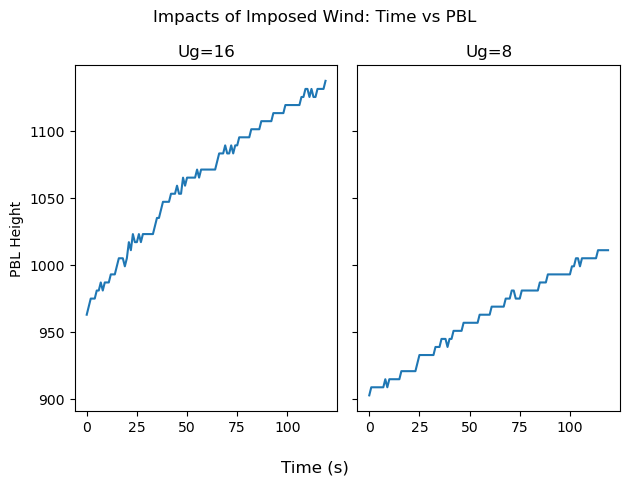

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

fig.suptitle('Impacts of Imposed Wind: Time vs PBL')

ax1.plot(iv16_3_plot_var.zi)
ax1.set_title(f"Ug=16")
ax1.set_ylabel("PBL Height")

ax2.plot(iv8_3_plot_var.zi)
ax2.set_title(f"Ug=8")

fig.supxlabel("Time (s)")
plt.tight_layout()


## Comparing Simulations: Potential Temperature vs Height (at time=100)

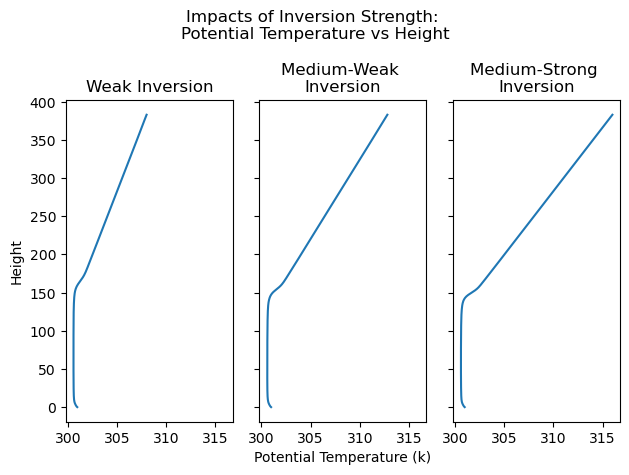

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True)

fig.suptitle('Impacts of Inversion Strength: \nPotential Temperature vs Height')

ax1.plot(iv8_3_plot_var.th.sel(time=100), range(len(iv8_3_plot_var.th.sel(time=100))))
ax1.set_title(f"Weak Inversion")
ax1.set_ylabel("Height")

ax2.plot(iii8_3_plot_var.th.sel(time=100), range(len(iii8_3_plot_var.th.sel(time=100))))
ax2.set_title(f"Medium-Weak \nInversion")
ax2.set_xlabel("Potential Temperature (k)")

ax3.plot(ii8_3_plot_var.th.sel(time=100), range(len(ii8_3_plot_var.th.sel(time=100))))
ax3.set_title(f"Medium-Strong \nInversion")

plt.tight_layout()

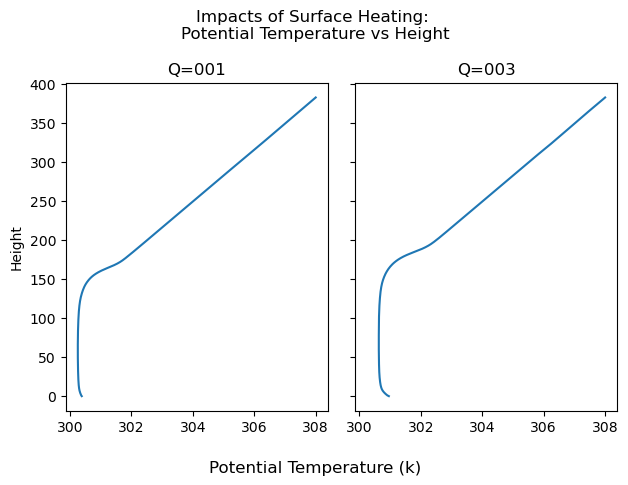

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

fig.suptitle('Impacts of Surface Heating: \nPotential Temperature vs Height')

ax1.plot(iv16_1_plot_var.th.sel(time=100), range(len(iv16_1_plot_var.th.sel(time=100))))
ax1.set_title(f"Q=001")
ax1.set_ylabel("Height")

ax2.plot(iv16_3_plot_var.th.sel(time=100), range(len(iv16_3_plot_var.th.sel(time=100))))
ax2.set_title(f"Q=003")

fig.supxlabel("Potential Temperature (k)")
plt.tight_layout()

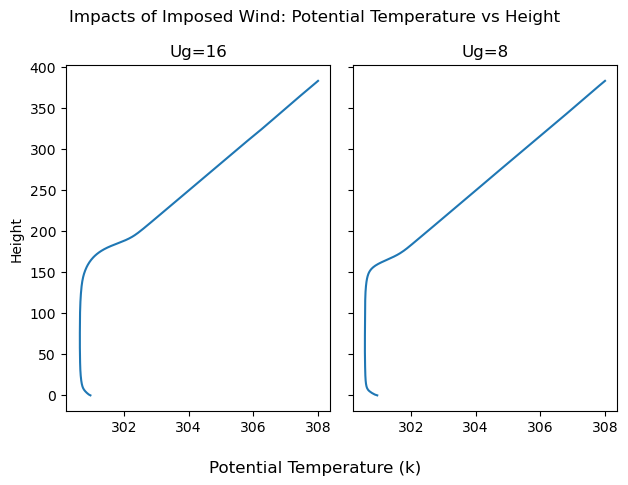

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

fig.suptitle('Impacts of Imposed Wind: Potential Temperature vs Height')

ax1.plot(iv16_3_plot_var.th.sel(time=100), range(len(iv16_3_plot_var.th.sel(time=100))))
ax1.set_title(f"Ug=16")
ax1.set_ylabel("Height")

ax2.plot(iv8_3_plot_var.th.sel(time=100), range(len(iv8_3_plot_var.th.sel(time=100))))
ax2.set_title(f"Ug=8")

fig.supxlabel("Potential Temperature (k)")
plt.tight_layout()


## Comparing Simulations: Potential Temperature Flux vs Height (at time=100)

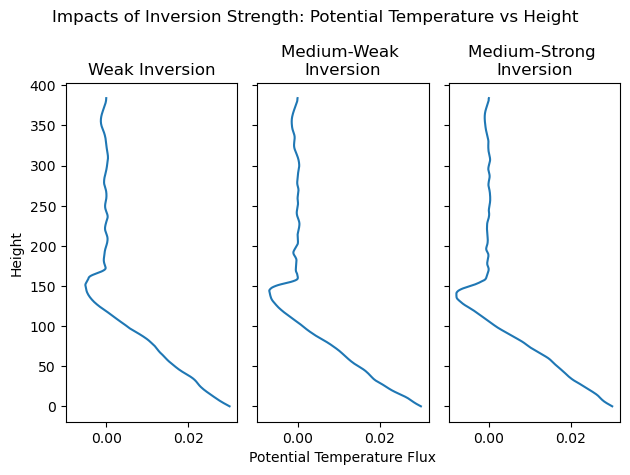

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True)

fig.suptitle('Impacts of Inversion Strength: Potential Temperature vs Height')

ax1.plot(iv8_3_plot_var.th_flux.sel(time=100), range(len(iv8_3_plot_var.th_flux.sel(time=100))))
ax1.set_title(f"Weak Inversion")
ax1.set_ylabel("Height")

ax2.plot(iii8_3_plot_var.th_flux.sel(time=100), range(len(iii8_3_plot_var.th_flux.sel(time=100))))
ax2.set_title(f"Medium-Weak \nInversion")
ax2.set_xlabel("Potential Temperature Flux")

ax3.plot(ii8_3_plot_var.th_flux.sel(time=100), range(len(ii8_3_plot_var.th_flux.sel(time=100))))
ax3.set_title(f"Medium-Strong \nInversion")

plt.tight_layout()

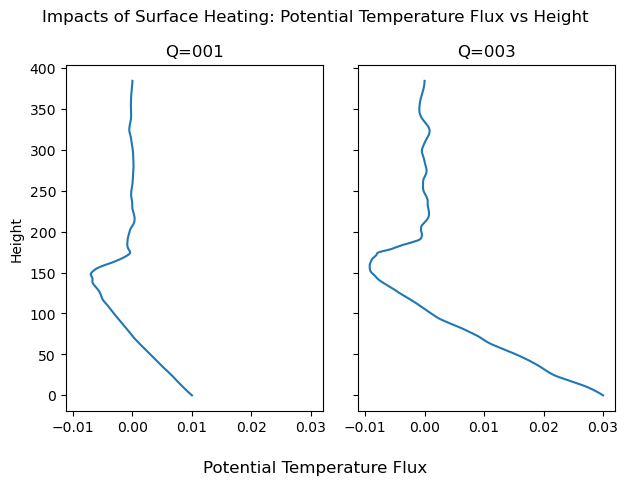

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

fig.suptitle('Impacts of Surface Heating: Potential Temperature Flux vs Height')

ax1.plot(iv16_1_plot_var.th_flux.sel(time=100), range(len(iv16_1_plot_var.th_flux.sel(time=100))))
ax1.set_title(f"Q=001")
ax1.set_ylabel("Height")

ax2.plot(iv16_3_plot_var.th_flux.sel(time=100), range(len(iv16_3_plot_var.th_flux.sel(time=100))))
ax2.set_title(f"Q=003")

fig.supxlabel("Potential Temperature Flux")
plt.tight_layout()

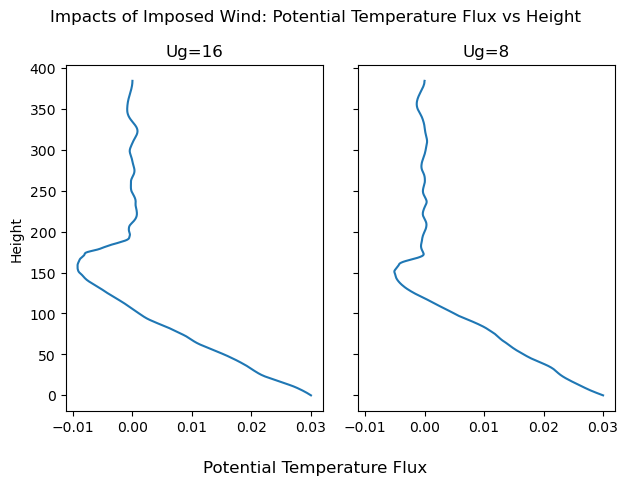

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

fig.suptitle('Impacts of Imposed Wind: Potential Temperature Flux vs Height')

ax1.plot(iv16_3_plot_var.th_flux.sel(time=100), range(len(iv16_3_plot_var.th_flux.sel(time=100))))
ax1.set_title(f"Ug=16")
ax1.set_ylabel("Height")

ax2.plot(iv8_3_plot_var.th_flux.sel(time=100), range(len(iv8_3_plot_var.th_flux.sel(time=100))))
ax2.set_title(f"Ug=8")

fig.supxlabel("Potential Temperature Flux")
plt.tight_layout()


# Equation Discovery for PBL Growth
Identify a list of variables that might influence the growth of the Planetary Boundary Layer (PBL) (represented as dh/dz).
The book chapter has a nice discussion on the relevant variables on the PBL growth. 


Assess whether the Equation Discovery (EQ) method can be used to derive a functional equation that explains PBL growth based on the identified variables.

This task involves both theoretical formulation and empirical verification, aiming to develop a predictive understanding of PBL dynamics.

## Finding and making variables for EQ

In [19]:
#printing out all the variables and long names
df = nc.Dataset(files[10], mode='r')
for group_name, group in df.groups.items():
    print(f"Group: {group_name}")
    for var_name, var in group.variables.items():
        long_name = var.getncattr('long_name') if 'long_name' in var.ncattrs() else 'No long_name attribute'
        dimensions = var.dimensions if hasattr(var, 'dimensions') else 'No dimensions attribute'
        print(f"  Variable: {var_name},  Long Name: {long_name},  Dimensions: {dimensions}")
df.close()

Group: default
  Variable: iter,  Long Name: Iteration number,  Dimensions: ('time',)
  Variable: area,  Long Name: Fractional area contained in mask,  Dimensions: ('time', 'z')
  Variable: areah,  Long Name: Fractional area contained in mask,  Dimensions: ('time', 'zh')
  Variable: eft,  Long Name: eft,  Dimensions: ('time', 'z')
  Variable: eft_3,  Long Name: Moment 3 of the eft,  Dimensions: ('time', 'z')
  Variable: eft_4,  Long Name: Moment 4 of the eft,  Dimensions: ('time', 'z')
  Variable: eft_diff,  Long Name: Diffusive flux of the eft,  Dimensions: ('time', 'zh')
  Variable: eft_w,  Long Name: Turbulent flux of the eft,  Dimensions: ('time', 'zh')
  Variable: eft_grad,  Long Name: Gradient of the eft,  Dimensions: ('time', 'zh')
  Variable: eft_2,  Long Name: Moment 2 of the eft,  Dimensions: ('time', 'z')
  Variable: eft_path,  Long Name: eft path,  Dimensions: ('time',)
  Variable: eft_flux,  Long Name: Total flux of the eft,  Dimensions: ('time', 'zh')
  Variable: sft,  Lo

In [120]:
def find_jump(ds, filter_num=.001):
    """
    Returns a dataset with the new variable
     th_jump with only the time coordinate
    """
    #making an array to store all the values of th_jump
    th_jump = np.array([])

    #prepping ds
    ds_jump = ds.copy()
    ds_jump = ds_jump[["th"]]

    #looping through every time and calculating th_jump
    for i in range(len(ds_jump.time)):

        #calculating the second derivate using np.diff
        #(central diff)
        diff_df = np.diff(ds_jump.sel(time=i).th, n=2)

        #putting the array into a dataframe to preserve the index
        #(height var)
        diff_df = pd.DataFrame(diff_df)
        diff_df = diff_df.reset_index()
        diff_df = diff_df.rename(columns={"index": "z", 0:"sec_der"})

        #chopping off the beginning and end of the df
        diff_df = diff_df.iloc[50:350]

        #filtering the df to only select for heights
        #with big enough second derivatives
        diff_df = diff_df[np.abs(diff_df["sec_der"]) >= filter_num]

        if len(diff_df) == 0:
            return "Try different filter num, everything filtered out"
        

        #getting the heights
        if (diff_df.z.iloc[1] - diff_df.z.iloc[0]) <= 1:
            min_z = diff_df.z.iloc[0]
        #making sure to cut off tails of sparse values
        else:
            j = 1
            while (diff_df.z.iloc[j+1] - diff_df.z.iloc[j]) >= 2:
                min_z = diff_df.z.iloc[j]
                j+=1

        
        if (diff_df.z.iloc[-1] - diff_df.z.iloc[-2]) <= 1:
            max_z = diff_df.z.iloc[-1]
        #making sure to cut off tails of sparse values
        else:
            j=-2
            while (diff_df.z.iloc[j] - diff_df.z.iloc[j-1]) >=2:
                max_z = diff_df.z.iloc[j]
                j-=1
        
        #calc th_jump
        jump = (ds_jump.sel(time=i, z=max_z).th.values - ds_jump.sel(time=i, z=min_z).th.values)
        if jump < 0:
            return f"Error in calculation: th_jump at time={i} is negative"

        #adding values to array
        if len(th_jump) == 0:
            th_jump = np.array([jump])
        else:
            th_jump = np.concatenate((th_jump, np.array([jump])))

    if len(th_jump) != len(ds_jump.time):
        return "Error in code"
    
    #adding array of th_jumps to the original ds, index is time
    ds = ds.assign(del_th_sd=(['time'],th_jump))


    return ds
    

In [81]:
def flux_jump(ds, filter_num=.00005):
    """
    Returns the ds with new variable delta theta rho 
    calculated using th_flux"""

    #making an array to store all the values of th_jump
    th_jump = np.array([])

    #prepping ds
    ds_jump = ds.copy()
    ds_jump = ds_jump[["th_flux"]]

    #looping through every time and calculating th_jump
    for i in range(len(ds_jump.time)):
        jump = ds_jump.sel(time=i)
        jump = jump.where(np.abs(jump.th_flux) <= filter_num)
        jump = jump.to_dataframe().reset_index()
        jump = jump.dropna()

        #finding min and max heights

        if (jump.zh.iloc[1] - jump.zh.iloc[0]) > 5:
            min_z = jump.zh.iloc[0]
            max_z = jump.zh.iloc[1]
        else:
            min_num = 1
            while (jump.zh.iloc[min_num+1] - jump.zh.iloc[min_num]) <= 5:
                min_z = jump.zh.iloc[min_num+1]
                max_z = jump.zh.iloc[min_num+2]
                min_num += 1

        #calculating jump
        th_iver = ds.sel(time=i, z=max_z).th.values - ds.sel(time=i, z=min_z).th.values

               #adding values to array
        if len(th_jump) == 0:
            th_jump = np.array([th_iver])
        else:
            th_jump = np.concatenate((th_jump, np.array([th_iver])))

    
    #adding array of th_jumps to the original ds, index is time
    ds = ds.assign(del_th_f=(['time'],th_jump)) 

    return ds

In [135]:
def prep_ds_ed(ds, ug, Q, filter_num_sd=.001, filter_num_f=.0001):
    """
    Makes an xarray dataset with all the necesscary variables for
    equation discovery"""

    ds_return = ds.copy()
    #selecting necessary vars
    ds_return = ds_return[["zi", "th", "th_flux", "b_flux"]]

    #calc dh/dt
    bl_evo = np.gradient(ds_return.zi, 1)
    #adding dh/dt to ds
    ds_return = ds_return.assign(dh_dt=(['time'],bl_evo))

    #finding del_th
    ds_return = find_jump(ds_return, filter_num_sd)
    ds_return = flux_jump(ds_return, filter_num_f)

    #calc dth_dz
    grad = np.gradient(ds_return.sel(time=10).th, 1)
    grad = np.round(grad[225], 3)
    dth_dz = grad*np.ones((ds_return.time.shape))
    ds_return = ds_return.assign(dth_dz=(["time"], dth_dz))
    
    #making th_0 var
    th_0 = 300 * np.ones((ds_return.time.shape))
    ds_return = ds_return.assign(th_0=(['time'],th_0)) 

    #making q var
    q = Q*np.ones((ds_return.time.shape))
    ds_return = ds_return.assign(q=(["time"], q))

    #making surface b_flux
    ds_return["b_flux_sfc"] = ds_return.b_flux.sel(zh=0)

    #making u_g var
    u_g = ug*np.ones((ds_return.time.shape))
    ds_return = ds_return.assign(u_g=(["time"], u_g))

    #resampling using coarsen across all variables
    ds_return = ds_return.coarsen(time=15).mean()
    
    return ds_return
    

In [238]:
def extract_var(var):
    """
    Returns a 1d array of the desired variable across all simulations
    """

    #making a list of all the simulations to loop through
    sim_list = [iv16_1_ed, iv16_3_ed, i16_6_ed,
            iv16_6_ed, iv16_10_ed, ii10_1_ed,
            i2_20_ed, iv2_10_ed, iii2_1_ed,
              iii8_3_ed, ii8_3_ed, 
            iv8_3_ed, iv8_6_ed]
    
    #making empty array to putt all the data in
    var_arr = np.array([])

    #making a 1d array of the var from the simulation
    for sim in sim_list:
        sim_var = sim[var].to_numpy()
        
        #adding to the var_arr
        if len(var_arr) == 0:
            var_arr = sim_var
        else:
            var_arr = np.concatenate((var_arr, sim_var))
    
    return var_arr


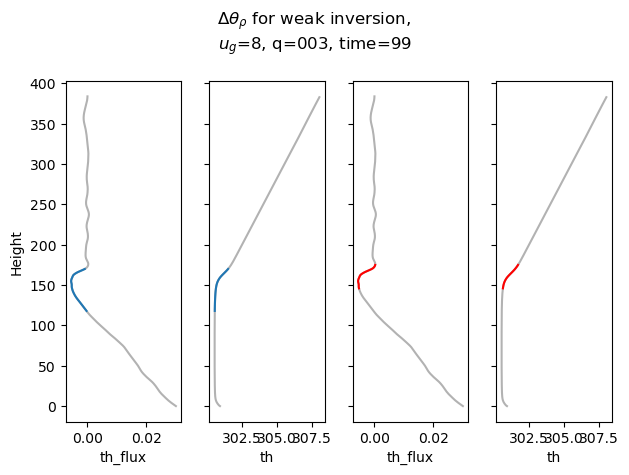

In [114]:
### comparing methods ####


## second derivative method ##


#making an array to store all the values of th_jump
th_jump = np.array([])

#prepping ds
ds_sec_der_f = iv8_3.copy()
ds_sec_der = ds_sec_der_f[["th"]]

#looping through every time and calculating th_jump
for i in range(99,100):#range(len(ds_sec_der.time)):

    #calculating the second derivate using np.diff
    #(central diff)
    diff_df = np.diff(ds_sec_der.sel(time=i).th, n=2)

    #putting the array into a dataframe to preserve the index
    #(height var)
    diff_df = pd.DataFrame(diff_df)
    diff_df = diff_df.reset_index()
    diff_df = diff_df.rename(columns={"index": "z", 0:"sec_der"})

    #chopping off the beginning and end of the df
    diff_df = diff_df.iloc[50:350]

    #filtering the df to only select for heights
    #with big enough second derivatives
    diff_df = diff_df[np.abs(diff_df["sec_der"]) >= .001]

    

    #getting the heights
    if (diff_df.z.iloc[1] - diff_df.z.iloc[0]) <= 1:
        min_z_sd = diff_df.z.iloc[0]
    #making sure to cut off tails of sparse values
    else:
        j = 1
        while (diff_df.z.iloc[j+1] - diff_df.z.iloc[j]) >= 2:
            min_z_sd = diff_df.z.iloc[j+1]
            j+=1

    
    if (diff_df.z.iloc[-1] - diff_df.z.iloc[-2]) <= 1:
        max_z_sd = diff_df.z.iloc[-1]
    #making sure to cut off tails of sparse values
    else:
        j=-2
        while (diff_df.z.iloc[j] - diff_df.z.iloc[j-1]) >=2:
            max_z_sd = diff_df.z.iloc[j-1]
            j-=1



## th_flux method ##

#making an array to store all the values of th_jump
th_jump = np.array([])

#prepping ds
ds_jump_f = iv8_3.copy()
ds_jump = ds_jump_f[["th_flux"]]

#looping through every time and calculating th_jump
for i in range(99,100):
    jump = ds_jump.sel(time=i)
    jump = jump.where(np.abs(jump.th_flux) <= .0005)
    jump = jump.to_dataframe().reset_index()
    jump = jump.dropna()

    #finding min and max heights

    if (jump.zh.iloc[1] - jump.zh.iloc[0]) > 5:
        min_z = jump.zh.iloc[0]
        max_z = jump.zh.iloc[1]
    else:
        min_num = 1
        while (jump.zh.iloc[min_num+1] - jump.zh.iloc[min_num]) <= 5:
            min_z = jump.zh.iloc[min_num+1]
            max_z = jump.zh.iloc[min_num+2]
            min_num += 1




### plotting ###


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)

fig.suptitle("$\\Delta\\theta_\\rho$ for weak inversion, \n$u_g$=8, q=003, time=99")

ax1.plot(ds_jump_f.th_flux.sel(time=99), ds_jump_f.zh, c="k", alpha=.3)
ax1.plot(ds_jump_f.th_flux.sel(time=99, zh=slice(min_z, max_z)), ds_jump_f.zh.sel(zh=slice(min_z, max_z)))
ax1.set_ylabel("Height")
ax1.set_xlabel("th_flux")

ax2.plot(ds_jump_f.th.sel(time=99), ds_jump_f.z, c="k", alpha=.3)
ax2.plot(ds_jump_f.th.sel(time=99, z=slice(min_z, max_z)), ds_jump_f.z.sel(z=slice(min_z, max_z)))
ax2.set_xlabel("th")

ax3.plot(ds_sec_der_f.th_flux.sel(time=99), ds_jump_f.zh, c="k", alpha=.3)
ax3.plot(ds_sec_der_f.th_flux.sel(time=99, zh=slice(min_z_sd, max_z_sd)),
          ds_jump_f.zh.sel(zh=slice(min_z_sd, max_z_sd)), c="r")
ax3.set_xlabel("th_flux")

ax4.plot(ds_sec_der_f.th.sel(time=99), ds_sec_der_f.z, c="k", alpha=.3)
ax4.plot(ds_sec_der_f.th.sel(time=99, z=slice(min_z_sd, max_z_sd)),
          ds_sec_der_f.z.sel(z=slice(min_z_sd, max_z_sd)), c="r")
ax4.set_xlabel("th")

plt.tight_layout()

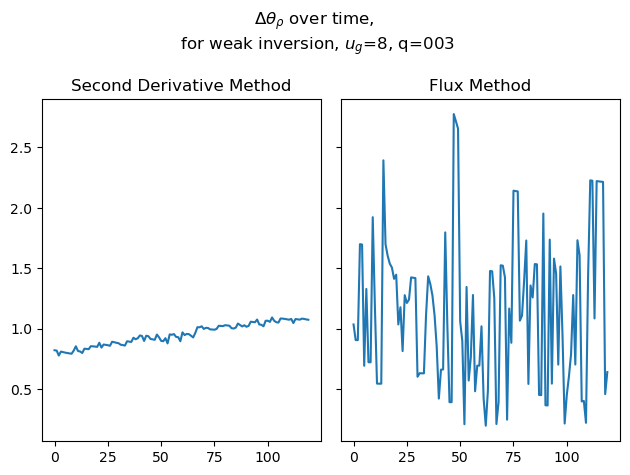

In [122]:
#trying functions, making sure that it works

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)

fig.suptitle(f"$\\Delta \\theta_\\rho$ over time, \n for weak inversion, $u_g$=8, q=003")

iv8_6_th_jump_sd = find_jump(iv8_3, .00125)
ax1.plot(iv8_6_th_jump_sd.time, iv8_6_th_jump_sd.del_th_sd)
ax1.set_title("Second Derivative Method")

iv8_6_th_jump_flux = flux_jump(iv8_3, .00005)
ax2.plot(iv8_6_th_jump_flux.time, iv8_6_th_jump_flux.del_th_f)
ax2.set_title("Flux Method")

plt.tight_layout()


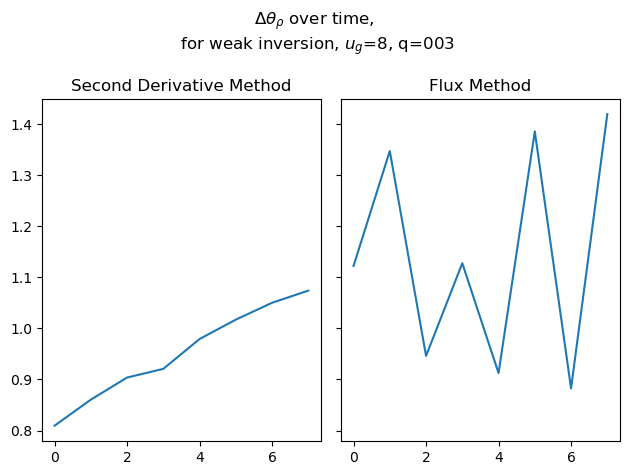

In [79]:
#trying functions, making sure that it works, but coarsened

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)

fig.suptitle(f"$\\Delta \\theta_\\rho$ over time, \n for weak inversion, $u_g$=8, q=003")

iv8_6_th_jump_sd = find_jump(iv8_3, .00125)
ax1.plot(iv8_6_th_jump_sd.coarsen(time=15).mean().time, iv8_6_th_jump_sd.coarsen(time=15).mean().del_th)
ax1.set_title("Second Derivative Method")

iv8_6_th_jump_flux = flux_jump(iv8_3, .00005)
ax2.plot(iv8_6_th_jump_flux.coarsen(time=15).mean().time, iv8_6_th_jump_flux.coarsen(time=15).mean().del_th_f)
ax2.set_title("Flux Method")

plt.tight_layout()


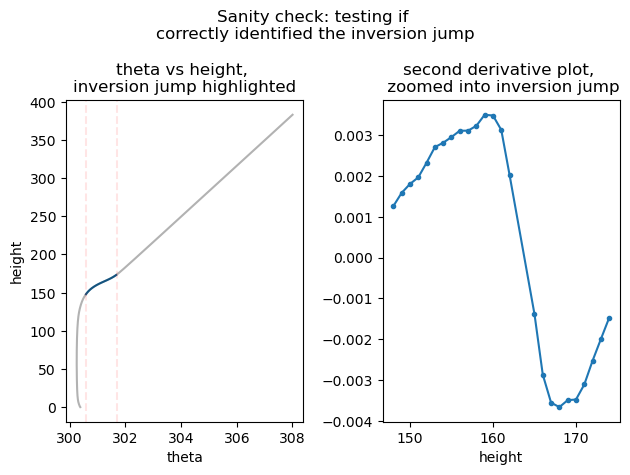

In [68]:
#sanity check
#doing similar code to the function and plotting
test_jump = iv16_1[["th"]]

test = np.diff(test_jump.sel(time=100).th, n=2)
test_df = pd.DataFrame(test)
test_df = test_df.reset_index()
test_df = test_df.iloc[50:350]
test_df = test_df.rename(columns={0:"sec_derive"})

test_df_filter = test_df[np.abs(test_df["sec_derive"]) >= .00125]


#plotting
low_height = test_df_filter["index"].iloc[0]
up_height = test_df_filter["index"].iloc[-1]

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(test_jump.th.sel(time=100,z=slice(low_height,up_height)), test_jump.z.sel(z=slice(low_height, up_height)))
ax1.plot(test_jump.th.sel(time=100), range(len(test_jump.th.sel(time=23))), c="k", alpha=.3)
ax1.set_title("theta vs height, \ninversion jump highlighted")
ax1.axvline(test_jump.th.sel(time=100, z=low_height), c="r", alpha=.1, linestyle='dashed')
ax1.axvline(test_jump.th.sel(time=100, z=up_height), c="r", alpha=.1, linestyle='dashed')
ax1.set_xlabel("theta")
ax1.set_ylabel("height")

ax2.plot(test_df_filter.sec_derive, marker=".")
ax2.set_title("second derivative plot, \n zoomed into inversion jump")
ax2.set_xlabel("height")

fig.suptitle("Sanity check: testing if \ncorrectly identified the inversion jump")
plt.tight_layout()

In [234]:
#prepping all the simulations for sr
iv16_1_ed = prep_ds_ed(iv16_1, 16, 1, filter_num_sd=.001, filter_num_f=.0002)
iv16_3_ed = prep_ds_ed(iv16_3, 16, 3, filter_num_sd=.00075)
i16_6_ed = prep_ds_ed(i16_6, 16, 6, filter_num_sd=.0002, filter_num_f=.0006)
iv16_6_ed = prep_ds_ed(iv16_6, 16, 6)
iv16_10_ed = prep_ds_ed(iv16_10, 16, 10, filter_num_f=.0002)
ii10_1_ed = prep_ds_ed(ii10_1, 10, 1, filter_num_f=.0002)
i2_20_ed = prep_ds_ed(i2_20,2, 20, filter_num_sd=.00025, filter_num_f=.0007)
iv2_10_ed = prep_ds_ed(iv2_10, 2, 10)
iii2_1_ed = prep_ds_ed(iii2_1, 2, 1)
#i2_24_ed = prep_ds_ed(i2_24, 2, 24, filter_num_sd=.002, filter_num_f=.00125)
iii8_3_ed = prep_ds_ed(iii8_3, 8, 3)
ii8_3_ed = prep_ds_ed(ii8_3, 8, 3)
iv8_3_ed = prep_ds_ed(iv8_3, 8, 3)
iv8_6_ed = prep_ds_ed(iv8_6, 8, 6)

In [240]:
## th_flux method ##

#making an array to store all the values of th_jump
th_jump = np.array([])

#prepping ds
ds_jump_f = i2_24.copy()
ds_jump = ds_jump_f[["th_flux"]]

#looping through every time and calculating th_jump
for i in range(len(i2_24.time)):
    jump = ds_jump.sel(time=i)
    jump = jump.where(np.abs(jump.th_flux) <= .0015)
    jump = jump.to_dataframe().reset_index()
    jump = jump.dropna()

    #finding min and max heights

    if (jump.zh.iloc[1] - jump.zh.iloc[0]) > 5:
        min_z = jump.zh.iloc[0]
        max_z = jump.zh.iloc[1]
    else:
        min_num = 1
        while (jump.zh.iloc[min_num+1] - jump.zh.iloc[min_num]) <= 5:
            min_z = jump.zh.iloc[min_num+1]
            max_z = jump.zh.iloc[min_num+2]
            min_num += 1

    
    #calculating jump
    th_iver = ds_jump_f.sel(time=i, z=max_z).th.values - ds_jump_f.sel(time=i, z=min_z).th.values

            #adding values to array
    if len(th_jump) == 0:
        th_jump = np.array([th_iver])
    else:
        th_jump = np.concatenate((th_jump, np.array([th_iver])))

## Equation discovery for BL growth over time

#### We'll try to discover equation 5.76 in Clouds and Climate:

$$\frac{dh}{dt} = A\frac{\overline{w'b'_{sfc}}}{\frac{g}{\theta_0}\Delta\theta_\rho} + \overline{w_h}$$

where
- A is a constant (typically .2 or .4)
- $\overline{w'b'_{sfc}}$ is buoyancy flux and is ```b_flux``` at zh=0 in the simulations
- g is a constant (gravity)
- $\theta_0$ is a constant (300k)
- $\Delta\theta_\rho$ is the change in $\theta$ at the inversion layer
- $\overline{w_h}$ is assumed to be 0


In [243]:
#extracting all the variables
dh_dt = extract_var("dh_dt")
b_flux = extract_var("b_flux_sfc")
th_0 = extract_var("th_0")
del_th_sd = extract_var("del_th_sd")
del_th_f = extract_var("del_th_f")
dth_dz = extract_var("dth_dz")
q = extract_var("q")
u_g = extract_var("u_g")



#stacking all the inputs
X_small_sd = np.column_stack([b_flux, del_th_sd])
X_small_f = np.column_stack([b_flux, del_th_f])

X_full_sd = np.column_stack([b_flux, del_th_sd, dth_dz, q, u_g])
X_full_f = np.column_stack([b_flux, del_th_f, dth_dz, q, u_g])


In [246]:
print(f"X shape is {X_full_f.shape}")
print(f"y shape is {dh_dt.shape}")

X shape is (98, 5)
y shape is (98,)


In [36]:
#making the model

pbl_h_model = PySRRegressor(
    niterations=1000,  # < Increase for better results
    batching=True, #same as minibatching for NN
    batch_size=50,

    binary_operators=["+", "-", "*", "/"],
    #unary_operators=[
    #    "cos",
    #    "exp",
    #    "sin",
        #"inv(x) = 1/x",
        #"cube",
    #    "square"
        # ^ Custom operator (julia syntax)
    #],
    #extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [255]:
#fit the model
pbl_h_model.fit(X_full_sd, dh_dt)

/home/laurapong321/anaconda3/envs/pnw_env/lib/python3.12/site-packages/pysr/sr.py:1843: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/laurapong321/anaconda3/envs/pnw_env/lib/python3.12/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 9.550e+04
Head worker occupation: 8.2%
Progress: 220 / 15000 total iterations (1.467%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           4.249e-01  1.594e+01  y = 1.144
3           3.408e-01  1.102e-01  y = 1.6682 / x₁
5           3.053e-01  5.497e-02  y = 1.5986 + (-0.16779 * x₁)
7           2.317e-01  1.378e-01  y = (x₀ / (x₁ / 547.86)) - -0.46976
9           2.130e-01  4.220e-02  y = (1.4932 / x₁) + ((x₀ * x₄) * x₄)
11          1.877e-01  6.320e-02  y = 0.74931 + (x₀ / ((x₂ / (x₁ - 7.8233)) / -1.9738))
13          1.752e-01  3.434e-02  y = 0.74931 + (x₀ / ((x₂ / (x₁ - (7.8233 * 0.91777))) / -1.973...
                                  8))
15          1.752e-01  2.231e-04  y = (x₀ / ((x₂ / (((x₁ - 7.8233) - -0.49234) - -0.21062)) / -1...
                                  .9738)) + 0.74931
19          1.679e-01  1.062e-02  y = 0.74931 

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          1.1386925   
	1        0.110727                                      1.696175 / x1   
	2        0.072686                        4.068673 / (1.7241011 + x1)   
	3        0.198018                 ((528.5657 * x0) + 0.8046252) / x1   
	4  >>>>  0.165714        (0.048686147 * x4) + (x0 / (x1 / 618.8159))   
	5        0.106376   (0.0714134 / (x1 / x4)) + (x0 / (x1 / 618.8159))   
	6        0.036937  (x0 / (x1 / 665.4678)) + (((x4 * 0.0047752573)...   
	7        0.013475  (((x4 / x1) + 1.47198) * (x4 * 0.004178662)) +...   
	8        0.004599  (0.004863497 * ((x4 / (x1 + (0.19330244 / x3))...   
	9        0.006781  (0.004863497 * ((x4 / (x1 + ((0.2821461 / x3) ...   
	
	       loss  complexity  
	0  0.424823           1  
	1  0.340433           3  
	2  0.294373           5  
	3  0.198108           7  
	4  0.142221           9  
	5  0.114965          11  
	6  0.106779          13  
	7  0.103939          15  
	8  0.102988          17  
	9  0.101600          19  
]

In [256]:
pbl_h_model.equations_

,complexity,loss,score,equation,sympy_format,lambda_format
0,1,0.424823,0.000000,1.1386925,1.13869250000000,PySRFunction(X=>1.13869250000000)
1,3,0.340433,0.110727,1.696175 / x1,1.696175/x1,PySRFunction(X=>1.696175/x1)
2,5,0.294373,0.072686,4.068673 / (1.7241011 + x1),4.068673/(x1 + 1.7241011),PySRFunction(X=>4.068673/(x1 + 1.7241011))
3,7,0.198108,0.198018,((528.5657 * x0) + 0.8046252) / x1,(528.5657*x0 + 0.8046252)/x1,PySRFunction(X=>(528.5657*x0 + 0.8046252)/x1)
4,9,0.142221,0.165714,(0.048686147 * x4) + (x0 / (x1 / 618.8159)),618.8159*x0/x1 + 0.048686147*x4,PySRFunction(X=>618.8159*x0/x1 + 0.048686147*x4)
5,11,0.114965,0.106376,(0.0714134 / (x1 / x4)) + (x0 / (x1 / 618.8159)),618.8159*x0/x1 + 0.0714134*x4/x1,PySRFunction(X=>618.8159*x0/x1 + 0.0714134*x4/x1)
6,13,0.106779,0.036937,(x0 / (x1 / 665.4678)) + (((x4 * 0.0047752573)...,665.4678*x0/x1 + 0.0047752573*x4**2/x1,PySRFunction(X=>665.4678*x0/x1 + 0.0047752573*...
7,15,0.103939,0.013475,(((x4 / x1) + 1.47198) * (x4 * 0.004178662)) +...,665.74005*x0/x1 + 0.004178662*x4*(1.47198 + x4...,PySRFunction(X=>665.74005*x0/x1 + 0.004178662*...
8,17,0.102988,0.004599,(0.004863497 * ((x4 / (x1 + (0.19330244 / x3))...,665.50806*x0/x1 + 0.004863497*x4**2/(x1 + 0.19...,PySRFunction(X=>665.50806*x0/x1 + 0.004863497*...
9,19,0.101600,0.006781,(0.004863497 * ((x4 / (x1 + ((0.2821461 / x3) ...,665.50806*x0/x1 + 0.004863497*x4**2/(x1 + 0.28...,PySRFunction(X=>665.50806*x0/x1 + 0.004863497*...


In [257]:
pbl_h_model.equations_.iloc[-1, 5]

PySRFunction(X=>665.50806*x0/x1 + 0.004863497*x4**2/(x1 + 0.2821461/x3**2))

**for reference:**
- $x_0$ is `b_flux`
- $x_1$ is `del_th`
- $x_2$ is `dth_dz`
- $x_3$ is `q`
- $x_4$ is `u_g`

In [258]:
small_sd_pred = -b_flux/(0.2709892*del_th_sd - 0.434218860101281) + 0.16354962 + (520.03156*b_flux + 0.619917)/del_th_sd
full_sd_pred = 665.50806*b_flux/del_th_sd + 0.004863497*u_g**2/(del_th_sd + 0.2821461/q**2)

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_5110/1435553877.py:5: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using $\\Delta\\theta_\\rho$ (sd method) and $\overline{w'b'_{sfc}}$")


Text(0, 0.5, "ED $\\frac{{{dh}}}{{{dt}}}$, using $\\Delta\\theta_\\rho$ (sd method) and $\\overline{w'b'_{sfc}}$")

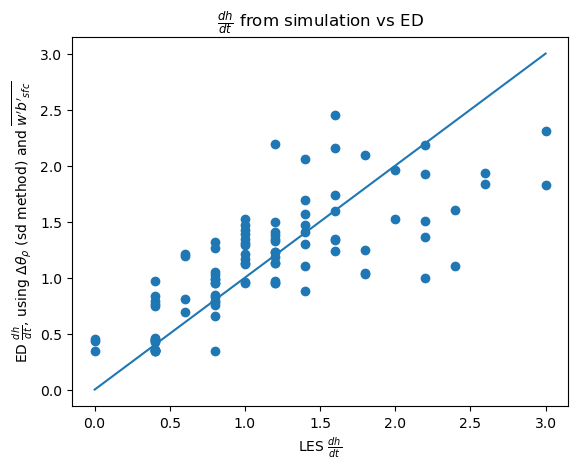

In [263]:
plt.scatter(dh_dt, small_sd_pred)
plt.plot([0,3], [0,3])
plt.title("$\\frac{{{dh}}}{{{dt}}}$ from simulation vs ED")
plt.xlabel("LES $\\frac{{{dh}}}{{{dt}}}$")
plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using $\\Delta\\theta_\\rho$ (sd method) and $\overline{w'b'_{sfc}}$")

Text(0, 0.5, 'ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics, \n and del_th_sd')

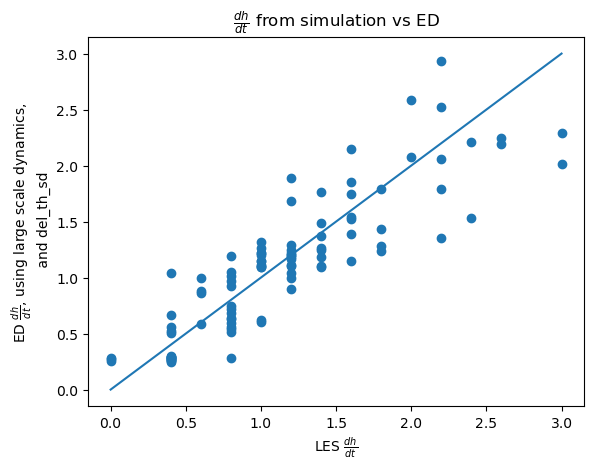

In [262]:
plt.scatter(dh_dt, full_sd_pred)
plt.plot([0,3], [0,3])
plt.title("$\\frac{{{dh}}}{{{dt}}}$ from simulation vs ED")
plt.xlabel("LES $\\frac{{{dh}}}{{{dt}}}$")
plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics, \n and del_th_sd")